# Analísis y visualización de los datos.

In [ ]:
#Importamos las librerias de pandas y numpy
import pandas as pd
import numpy as np

#También las librerias que necesitamos para los graficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp


In [ ]:
#Cargamos el fichero de datos
file = '/content/data/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


***Explicación de las variables:***

**ID** - ID

**b** - Hora de inicio

**e** - Hora de finalización

**LBE** - Línea base de la frecuencia cardíaca fetal (latidos por minuto)

**AC**- Número de aceleraciones por segundo

**FM** - Número de movimientos fetales por segundo

**UC**- Número de contracciones uterinas por segundo

**ASTV** - Porcentaje de tiempo con variabilidad anormal a corto plazo

**MSTV**- Valor medio de la variabilidad a corto plazo

**ALTV**- Porcentaje de tiempo con variabilidad anormal a largo plazo

**MLTV**- Valor medio de la variabilidad a largo plazo

**DL** - Número de desaceleraciones de luz por segundo

**DS**- Número de desaceleraciones severas por segundo

**DP** - Número de desaceleraciones prolongadas por segundo

**DR** - Número de desaceleraciones repetitivas por segundo

**Width** - Ancho del histograma de FHR

**Min** - Mínimo (frecuencia baja) del histograma de FHR

**Max** - Máximo (alta frecuencia) de histograma de FHR

**Nmax** - Número de picos del histograma

**Nzeros** - Número de ceros del histograma

**Mode** - Modo de histograma

**Mean** - Media del histograma

**Median** - Mediana del histograma

**Variance** - Varianza del histograma

**Tendency** - Tendencia del histograma

**Target** - Código de clase de estado fetal


In [ ]:
#Vemos información heneral
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

***De la información vemos que tenemos 2126 filas y 26 columnas. También vemos el tipo de dato. Vemos que todas las variables son numericas. La variable dependiente será Target y las demas variables son explicativas.***

In [ ]:
#Vamos a comprobar los valores únicos para cada variable.
data.agg(['nunique'])

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
nunique,2126,979,1064,48,22,96,19,75,57,87,...,109,86,18,9,88,103,95,133,3,2


***Esta información nos sirve para la limpieza de los datos.***

***Vemos por ejemplo que la variable ID tiene 2126 valores distintos, lo que es lo más logico, porque el ID es valor único. La Target tiene dos valores, que son 'Estado normal' y 'Estado anormal', DR - tiene un valor constante de 1.***

***Las variables discretas son:***

***DS- 2 valores.***

***DP- 5 valores.***

***DR- 1 valor***.

***Tendency - 3 valores.***

***Target - 2 valores.***

***Todas las demás variables las consideramos continuas porque toman más valores.***

***La variable ID la vamos a eliminar porque no nos sirve para el analisis, 'b' - que es la hora de inicio y tiene 979 valores, tampoco. La 'e' tampoco. La DR que tiene valor constante, tampoco. Las eliminamos, porque no estan relacionadas con la variable Target.***

In [ ]:
#Eliminamos las variables ID, b, e, DR 
data = data.drop(["ID", "b", "e", "DR"], axis = 1)

In [ ]:
#Lo comprobamos
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
#Otra parte obligatoria es comprobar si hay nulos
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

***No hay nulos.***

In [ ]:
#Medidas de Centralización, Localización y Dispersión de todo el Dataset.
data.describe().transpose()
#Se puede poner también: data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


***Las medidas de Centralización, Localización y Dispersión de las variables FM, ALTV y Median las vemos más abajo.*** 

***FM- Centralización: 7.24, Localización: 75% alrededor del 2, Desviación: de 0 (min) a 564(max).***

In [ ]:
data['FM'].describe().transpose()

count    2126.000000
mean        7.241298
std        37.125309
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       564.000000
Name: FM, dtype: float64

***ALTV - Centralización: 9.85, Localización: 75% alrededor del 11, Desviación: de 0 (min) a 91(max).***

In [ ]:
data['ALTV'].describe().T

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

***Median - Centralización: 138.09, Localización: 25% alrededor del 129, 50% alrededor del 139, 75% alrededor del 148, Desviación: de 77 (min) a 186(max)***

In [ ]:
data['Median'].describe().T

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

***En el histograma de abajo vemos la proporción de estados normales y anormales del feto, donde 0 (1655) son normales y el 1 (471) anormales.***

0    1655
1     471
Name: Target, dtype: int64


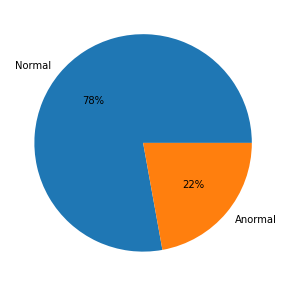

In [ ]:
#Distribución de frecuencias de Target (la variable objetivo)
a, b = data['Target'].value_counts()
plt.figure(figsize= (13,5))
plt.subplot(121)
plt.pie([a, b], labels = ['Normal', 'Anormal'], autopct= '%1.0f%%')
print(data['Target'].value_counts())

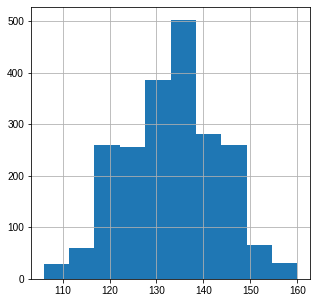

In [ ]:
#Histograma de la variable LBE
fig, ax = plt.subplots(1,1, figsize = (5,5))
plt.style.use('seaborn')
data['LBE'].hist(ax=ax)

***Desaceleraciones severas alrededor de 0.***

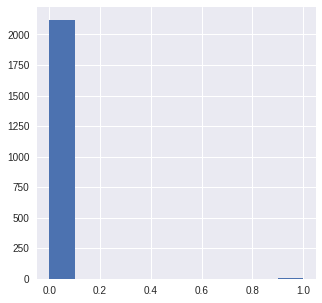

In [ ]:
#Histograma de la variable DS - número de desaceleraciones severas por segundo
fig, ax = plt.subplots(1,1, figsize = (5,5))
plt.style.use('seaborn')
data['DS'].hist(ax=ax)

***De la histograma de la frecuencia baja (Min) podemos visualizar que la mínima esta alrededor de 50, la máxima 160, esta centralizada de 70 a 130...***

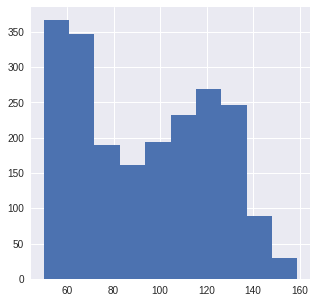

In [ ]:
#Histograma de la variable Min
fig, ax = plt.subplots(1,1, figsize = (5,5))
plt.style.use('seaborn')
data['Min'].hist(ax=ax)

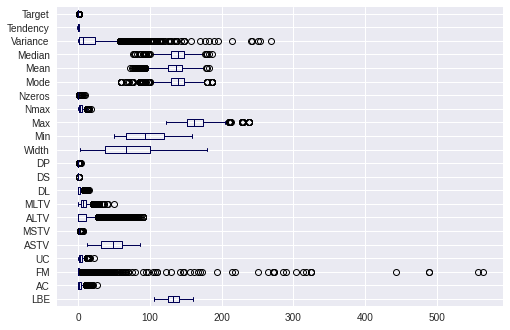

In [ ]:
#Box plot
data_box_plot = data.boxplot( vert = False, color = '#000054')

***Con el boxplot general vemos que la variable FM tiene outliers.***

***Del boxplot de abajo visualizamos las tres variables el min, el max, dónde estan centralizadas, la dispersion.....***

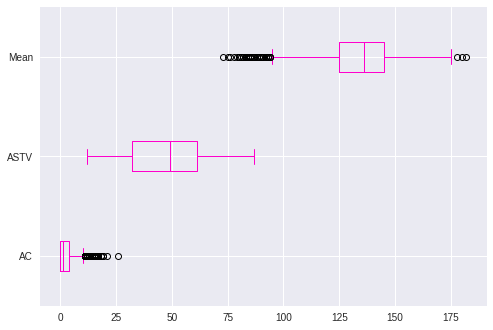

In [ ]:
data_box_plot_AC_ASTV_Mean = data.boxplot(['AC','ASTV', 'Mean'], vert = False, color = '#FF00CC')

===============================================================

===============================================================

# Naive Bayes

*   ***Enumeramos las 3 variables explicativas que presentan mayor correlación con el target.*** 
*   ***Creamos un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.***

*   ***A partir del conjunto de entrenamiento ajustamos un modelo a partir del algoritmo de Naive Bayes.***
*   ***Obtenemos la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.***


***De la figura de abajo vemos las 3 variables con mayor correlación con el Traget, pero que tampoco es muy fuerte y son:***

***ASTV - 0.49***

***ALTV - 0.49***

***AC - (-0.34)*** 

***Se ven otras que estan relacionadas fuertemente esntre si que son la Mode, Mean y la Median, se ven en un rectangulo rojo fuerte, pero la mayoria de las variables no estan relacionadas con la Target, así que podemos usar la Teorema de Bayes.***



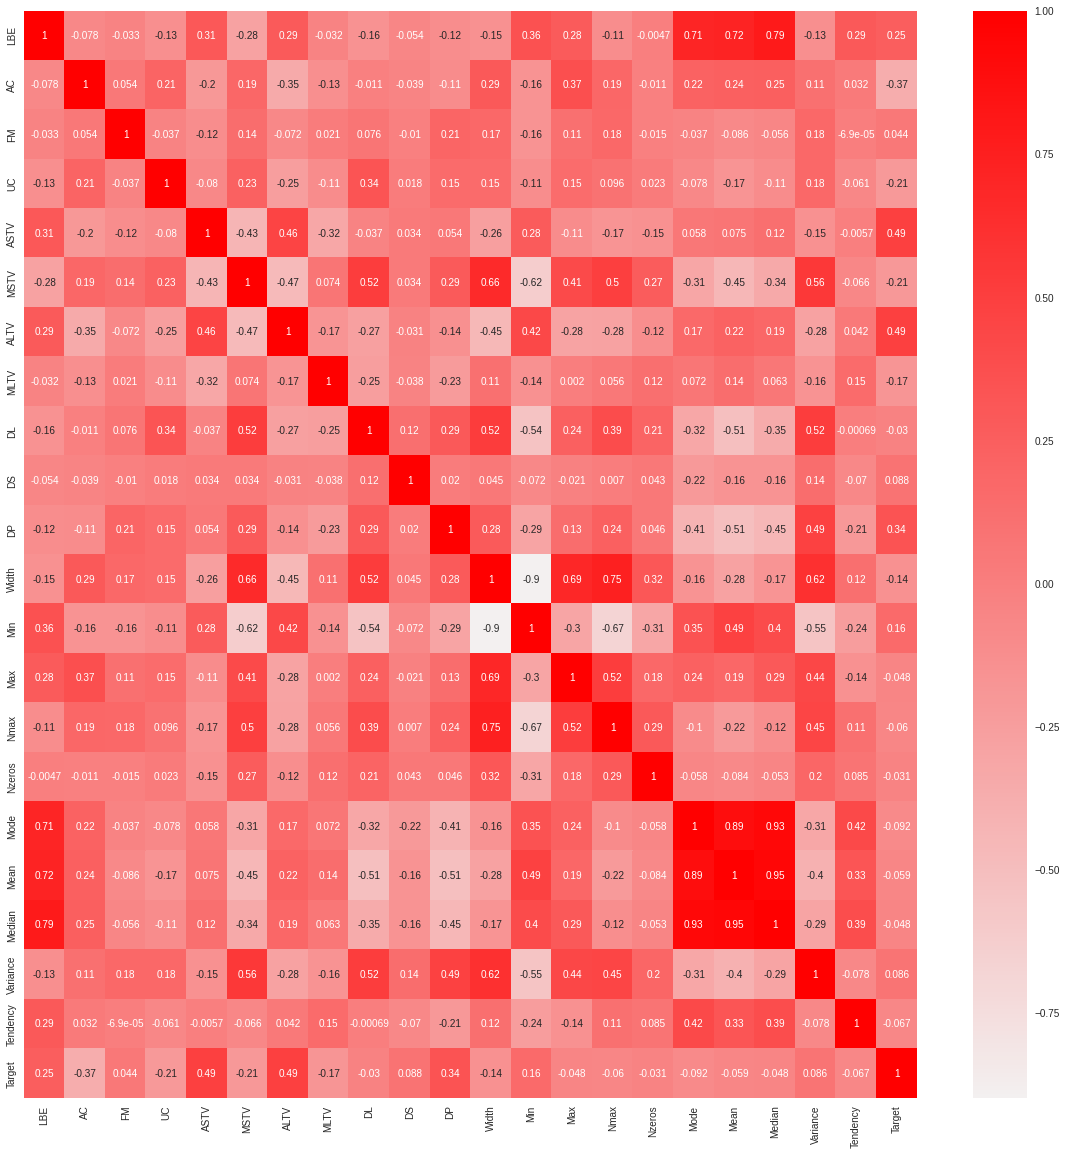

In [ ]:
#Diagrama Correlación
plt.figure(figsize= (20,20))
corr = data.corr()
cmap = sns.color_palette("light:r", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
pass

***Importamos la función*** *train_test_split* ***para entrenar nuestro modelo. En el eje*** *X* ***ponemos todas las variables explicativas y en el eje*** *y* ***la variable dependiente Target.***

In [ ]:
#Entrenamiento y test
from sklearn.model_selection import train_test_split
import random
X = data.loc[ :, data.columns != 'Target']
y = data.loc[ :, data.columns == 'Target']

In [ ]:
#La comprobamos, imprimiendo el eje Y
print(y)

      Target
0          1
1          0
2          0
3          0
4          0
...      ...
2121       1
2122       1
2123       1
2124       1
2125       0

[2126 rows x 1 columns]


***Creamos el conjunto de datos, que contendrá el 60% de los datos y la curva Roc nos sale 95/93%.***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state= 0)


In [ ]:
#Importamos Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Ajustamos el modelo con la función fit().
modelNB = gnb.fit(X_train, y_train.values.ravel())
#Predecimos el modelo con predict_proba().
y_pre_train = modelNB.predict_proba(X_train)
y_pre_test = modelNB.predict_proba(X_test)


***Para dibujar la curva ROC importamos la función roc_curve y para la area bajo la curva - auc.***

In [ ]:
#Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Especificamos la curva ROC de train
fpr_train, tpr_train, _ = roc_curve(y_train, y_pre_train[ :,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Especificamos la curva ROC de test
fpr_test, tpr_test, _  = roc_curve(y_test, y_pre_test[ :, 1])
roc_auc_test = auc(fpr_test, tpr_test)

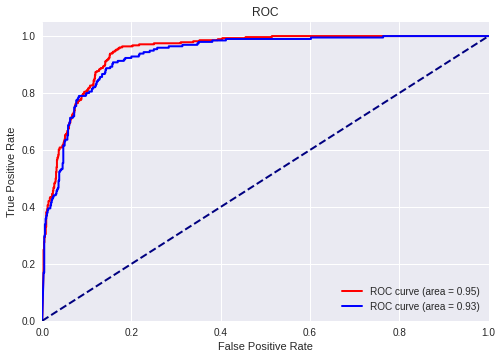

In [ ]:
#Gráfico
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "red", lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "blue", lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

***Cuanto más parecidas estan las dos curvas, la de entrenamiento y la de test, mejor nos salen los resultados.*** 

***El resultado nos sale 95/93. Vamos a intentar ajustarlo más, poniendo la semilla a 5.***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state= 5)

In [ ]:
gnb8 = GaussianNB()

#Ajustamos el modelo con la función fit().
modelNB = gnb8.fit(X_train, y_train.values.ravel())
#Predecimos el modelo con predict_proba().
y_pre_train = modelNB.predict_proba(X_train)
y_pre_test = modelNB.predict_proba(X_test)

In [ ]:
#Especificamos la curva ROC de train
fpr_train, tpr_train, _ = roc_curve(y_train, y_pre_train[ :,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Especificamos la curva ROC de test
fpr_test, tpr_test, _  = roc_curve(y_test, y_pre_test[ :, 1])
roc_auc_test = auc(fpr_test, tpr_test)

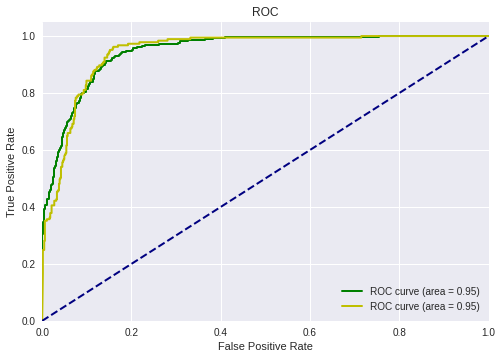

In [ ]:
#Gráfico con 60% de los datos y semilla a 5.
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "g", lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "y", lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

***Vemos que la prueba con la semilla a 5 nos ha salido perfecta. 95/95% de exctitud de positivis y falsos negativos en las pruebas. Las dos líneas casi iguales, coincidiendo totalmente en la parte superior.***

***La curva ROC nos muestra la sensibilidad y la especifidad de  cada punto de corte un test diagnóstico cuya escala de medición es continua.***

***La curva ROC se construye en base a la unión de distintos puntos de corte, correspondiendo el eje Y a la sensibilidad y el eje X a (1-especificidad) de cada uno de ellos. Ambos ejes incluyen valores entre 0 y 1 (0% y 100%).***

***Para entenderlo mejor pensamos que el eje Y nos muestra verdaderos positivos y el eje X los falsos positivos.***

***La mayor capacidad de un test diagnostico seria cuando sus puntos de corte estan lo más lejano posible de la línea de no-discriminación (la diagonal AUC). Dicho de otra manera, lo más cercanos posible a los lados izquierdo y superior del gráfico.***

***La AUC decimos que es =o.5 porque divide el gráfico en dos mitades.*** 

***A medida que el AUC de un test diagnóstico se acerca al valor 1,00 (test diagnóstico perfecto), mayor será su capacidad discriminativa.***

===============================================================

===============================================================

# SVM


*   ***A partir del conjunto de entrenamiento y test creados, ajustamos un modelo utilizando el algoritmo SVM dejando los valores por defecto.***
*   ***Obtenemos la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.***


*   ***Comparamos en la misma gráfica, la curva ROC y el AUC para el conjunto de test clasificado con Naive Bayes y con SVM.***






In [ ]:
#Importamos las funciones que nos harán falta
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC

***También nos haran falsta: train_test_split, roc_auc_score, roc_curve y auc, pero ya las tenemos importadas e importamos solo las que nos faltan.***

In [ ]:
#Desactivamos los warnings
import warnings
warnings.filterwarnings('ignore')

***Vamos a entrenar el modelo con los valores por defecto del SVM. Vemos que el modelo que usa es el Gausiano.***

In [44]:
svmLinealDef = svm.SVC(
                        C= 1,
                       kernel = "rbf",
                       degree = 3,
                       gamma = "scale",
                       coef0= 0,
                       shrinking = True,
                       probability= True,
                       tol = 0.001,
                       cache_size = 200,
                       verbose = False,
                       max_iter= -1,
                       decision_function_shape= "ovr",
                       break_ties = False,

)

svmLinealDef.fit(X_train, y_train)

y_proba_train_svm_def = svmLinealDef.predict_proba(X_train)
y_proba_test_svm_def = svmLinealDef.predict_proba(X_test)

In [45]:
#Entrenamiento
fpr_train_svm_def, tpr_train_svm_def, _ = roc_curve(y_train, y_proba_train_svm_def[:, 1])
roc_auc_train_svm_def = auc(fpr_train_svm_def, tpr_train_svm_def)

#Test
fpr_test_svm_def, tpr_test_svm_def, _ = roc_curve(y_test, y_proba_test_svm_def[:, 1])
roc_auc_test_svm_def = auc(fpr_test_svm_def, tpr_test_svm_def)

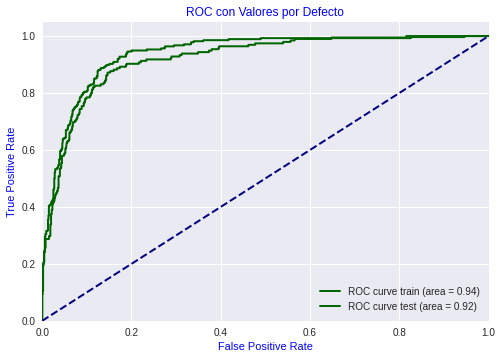

In [46]:
#Curva ROC y AUC con SVM con los valores por defecto
plt.figure()
lw = 2

plt.plot(fpr_train_svm_def, tpr_train_svm_def,color = 'darkgreen',lw=lw,label='ROC curve train (area = %0.2f)'% roc_auc_train_svm_def)
plt.plot(fpr_test_svm_def, tpr_test_svm_def,color = 'darkgreen',lw=lw,label='ROC curve test (area = %0.2f)'% roc_auc_test_svm_def)

plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", color = 'b')
plt.ylabel("True Positive Rate", color = 'b')
plt.title("ROC con Valores por Defecto", color = 'b')
plt.legend(loc = "lower right")
plt.show()

***Al poner los valores por defecto 'probability' = False, nos da un error que para predict_proba (que es la que hemos usado), no se puede hacer. Lo cambiamos poniendola en True. Y nos da un sobreajuste de 0.02.***

***Para ver que modelo usar y que parametros, usamos la finción GridSearchCV, que nos mostrará con qué algoritmo nos saldrá mejor.***

***Donde pondremos los tres modelos, el Gaussiano (rbf), el lineal y el poly. Al del lineal no hace falta ponerle el grado. Y 'C' para los errores que permitimos.***

In [47]:
#Importamos la función GridSearchCV
from sklearn.model_selection import GridSearchCV

#Parametros 
param_grid = [
              {'kernel':['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1,1,10]},
              {'kernel':['linear'], 'C': [0.1,1,10]},
              {'kernel': ['poly'], 'C': [0.1,1,10], 'degree': [2, 3]}
]

grid = GridSearchCV(
    estimator = SVC(),
    param_grid=param_grid,
    scoring= 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose = 0,
    return_train_score= True
)

grid.fit(X = X_train, y= y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [48]:
#Resultados del Grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
          .drop(columns = 'params')\
          .sort_values('mean_test_score', ascending = False)\
          .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.961140,0.009888,0.971758,0.004486
5,10,0.0001,rbf,NaN,0.960422,0.005075,0.982315,0.001190
6,0.1,NaN,linear,NaN,0.959171,0.011102,0.968995,0.006302
8,10,NaN,linear,NaN,0.957626,0.012830,0.971892,0.004544
3,1,0.0001,rbf,NaN,0.949020,0.008383,0.962050,0.001849
4,10,0.001,rbf,NaN,0.947823,0.005539,0.998932,0.000856
2,1,0.001,rbf,NaN,0.944961,0.004728,0.988773,0.000816
14,10,NaN,poly,3,0.942557,0.010176,0.952633,0.005858
13,10,NaN,poly,2,0.937084,0.009289,0.944851,0.004812
1,0.1,0.0001,rbf,NaN,0.929805,0.012450,0.935924,0.003403


***Y para que nos lo muestre:***

In [49]:
#Mejor parametro
print(grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [50]:
#Mejor estimador
print(grid.best_estimator_)

SVC(C=1, kernel='linear')


***Vamos a usar el modelo que nos recomienda la función GridSearchCV.***

In [51]:
#SVM lineal
svmLineal = svm.SVC(
                      C = 1,
                     kernel = 'linear',
                     degree = 1,
                     probability = True    
)
#Ajustamos con fit
svmLineal.fit(X_train, y_train)

#Validación del conjunto de test.
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [52]:
#Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

#Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

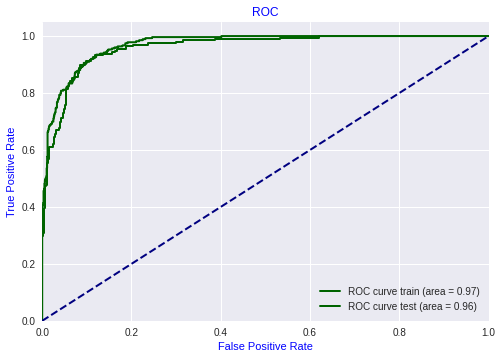

In [53]:
#Curva ROC y AUC con SVM
plt.figure()
lw = 2

plt.plot(fpr_train_svm, tpr_train_svm,color = 'darkgreen',lw=lw,label='ROC curve train (area = %0.2f)'% roc_auc_train_svm)
plt.plot(fpr_test_svm, tpr_test_svm,color = 'darkgreen',lw=lw,label='ROC curve test (area = %0.2f)'% roc_auc_test_svm)

plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", color = 'b')
plt.ylabel("True Positive Rate", color = 'b')
plt.title("ROC", color = 'b')
plt.legend(loc = "lower right")
plt.show()

***De la gráfica vemos que nos han salido muy bien con el SVM 97/96. El auce esta a 0.01, lo que está muy bueno.***

***Jugando con los hiperparametros por ejemplo kernel pòlinómico y de grado 2 nos sale 93/91, si subimos el grado a 10 por ejemplo, nos mejora los resultados de training a un 98, pero el de test es de 94 y tenemos bastante sobreajuste.***

***Si al C, le permitimos que se equiboque mucho, poniendole un 10 nos sale igual de bien que cuando era a 1 (97/96).***

***Vamos a comparar los dos modelos con Naive Bayes y SVM en un mismo gráfico.***

In [54]:
#Importamos Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Ajustamos el modelo con la función fit().
modelNB = gnb.fit(X_train, y_train.values.ravel())
#Predecimos el modelo con predict_proba().
y_pre_train = modelNB.predict_proba(X_train)
y_pre_test = modelNB.predict_proba(X_test)

#Especificamos la curva ROC de train NB
fpr_train, tpr_train, _ = roc_curve(y_train, y_pre_train[ :,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Especificamos la curva ROC de test NB
fpr_test, tpr_test, _  = roc_curve(y_test, y_pre_test[ :, 1])
roc_auc_test = auc(fpr_test, tpr_test)

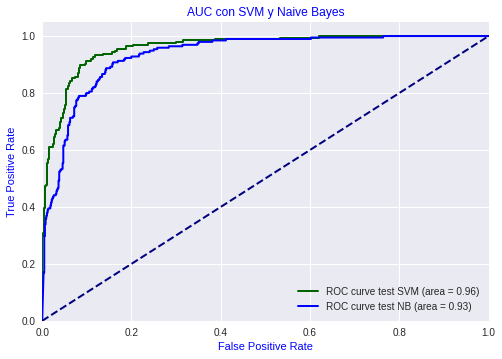

In [55]:
#Curva ROC y AUC con Naive Bayes y SVM el que nos ha salido mejor
plt.figure()
lw = 2

#plt.plot(fpr_train_svm, tpr_train_svm,color = 'darkgreen',lw=lw,label='ROC curve train (area = %0.2f)'% roc_auc_train_svm)
plt.plot(fpr_test_svm, tpr_test_svm,color = 'darkgreen',lw=lw,label='ROC curve test SVM (area = %0.2f)'% roc_auc_test_svm)

#plt.plot(fpr_train, tpr_train, color = "red", lw = lw, label = "ROC curve train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "blue", lw = lw, label = "ROC curve test NB (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", color = 'b')
plt.ylabel("True Positive Rate", color = 'b')
plt.title("AUC con SVM y Naive Bayes", color = 'b')
plt.legend(loc = "lower right")
plt.show()

***Vemos que los resultados con SVM nos han salido mejor 97/96 y con Naive Bayes 95/93. Que respectivamente el area bajo la curva son los del Test con SVM 96 y con Naive Bayes 93.***